In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
root = os.getcwd()
root

'./fair_taucc'

In [3]:
plot_path = root + "/plots/1_by_k"
plot_path

'./fair_taucc/plots/1_by_k'

In [4]:
dataset = "movielens-1m"
sensitive = "age"
version = "fair"

In [5]:
taucc_path = root + f"/results/{dataset}/{sensitive}/taucc_{version}/init_random"
gupta_path = root + f"/algorithms/Fair-k-means-Clustering-via-Algorithmic-Fairness/FRAC_OE/general Tau% rule/Kmeans_Kmedian/{dataset}_preproc/{sensitive}/1_by_k"
frisch_path = root + f"/algorithms/C-Fairness-RecSys/reproducibility_study/Frisch_et_al/results/{dataset}/{sensitive}/lbm_{version}"
bera_path = root + f"/algorithms/fair_algorithms_for_clustering/output/deltas0/{dataset}_{sensitive}"

In [6]:
taucc = pd.read_csv(taucc_path + "/aggregated.csv")
gupta = pd.read_csv(gupta_path + "/aggregated.csv")
frisch = pd.read_csv(frisch_path + "/aggregated.csv")
bera = pd.read_csv(bera_path + "/aggregated.csv")

In [7]:
taucc = taucc[(taucc["fair_major"]==1.0) & (taucc["fair_minor1"]==1.0) & (taucc["fair_minor2"]==1.0)]
taucc

,fair_major,fair_minor1,fair_minor2,tau_x_mean,tau_y_mean,NMI_true_labels_mean,AMI_true_labels_mean,ARI_true_labels_mean,NMI_rows_mean,AMI_rows_mean,...,NMI_rows_var,AMI_rows_var,ARI_rows_var,NMI_cols_var,AMI_cols_var,ARI_cols_var,balance_chierichetti_var,balance_bera_var,KL_fairness_error_var,time_var
1330,1.0,1.0,1.0,0.0163,0.069938,0.131279,0.128352,0.08801,0.198247,0.197847,...,0.000281,0.000281,0.000088,0.000749,0.000749,0.000835,0.0,0.0,0.0,4.614703


In [8]:
gupta

,K,cost_mean,balance_chierichetti_mean,balance_bera_mean,KL_fair_mean,time_mean,NMI_rows_mean,AMI_rows_mean,ARI_rows_mean,cost_std,...,AMI_rows_std,ARI_rows_std,cost_var,balance_chierichetti_var,balance_bera_var,KL_fair_var,time_var,NMI_rows_var,AMI_rows_var,ARI_rows_var
0,10,5502.500123,0.253644,0.993151,0.000035,5189.01213,0.391966,0.390118,0.217315,9.58451,...,0.012391,0.017102,91.862824,0.0,0.0,0.0,217687.13341,0.000153,0.000154,0.000292


In [9]:
gupta = gupta.rename(columns={'KL_fair_mean': 'KL_fairness_error_mean', 
                             'KL_fair_std': 'KL_fairness_error_std',
                             'KL_fair_var': 'KL_fairness_error_var'})
gupta.drop(["K"], axis=1, inplace=True)
gupta

,cost_mean,balance_chierichetti_mean,balance_bera_mean,KL_fairness_error_mean,time_mean,NMI_rows_mean,AMI_rows_mean,ARI_rows_mean,cost_std,balance_chierichetti_std,...,AMI_rows_std,ARI_rows_std,cost_var,balance_chierichetti_var,balance_bera_var,KL_fairness_error_var,time_var,NMI_rows_var,AMI_rows_var,ARI_rows_var
0,5502.500123,0.253644,0.993151,0.000035,5189.01213,0.391966,0.390118,0.217315,9.58451,0.0,...,0.012391,0.017102,91.862824,0.0,0.0,0.0,217687.13341,0.000153,0.000154,0.000292


In [10]:
bera = bera.rename(columns={'KL_fair_mean': 'KL_fairness_error_mean', 
                             'KL_fair_std': 'KL_fairness_error_std',
                             'KL_fair_var': 'KL_fairness_error_var'})
bera.keys()

Index(['cost_mean', 'cost_std', 'cost_var', 'balance_chierichetti_mean',
       'balance_chierichetti_std', 'balance_chierichetti_var',
       'balance_bera_mean', 'balance_bera_std', 'balance_bera_var',
       'KL_fairness_error_mean', 'KL_fairness_error_std',
       'KL_fairness_error_var', 'NMI_rows_mean', 'NMI_rows_std',
       'NMI_rows_var', 'AMI_rows_mean', 'AMI_rows_std', 'AMI_rows_var',
       'ARI_rows_mean', 'ARI_rows_std', 'ARI_rows_var', 'time_mean',
       'time_std', 'time_var'],
      dtype='object')

In [11]:
df = pd.concat([taucc, gupta, frisch, bera], ignore_index=True)
#df = pd.concat([taucc, gupta], ignore_index=True)
df

,fair_major,fair_minor1,fair_minor2,tau_x_mean,tau_y_mean,NMI_true_labels_mean,AMI_true_labels_mean,ARI_true_labels_mean,NMI_rows_mean,AMI_rows_mean,...,NMI_cols_var,AMI_cols_var,ARI_cols_var,balance_chierichetti_var,balance_bera_var,KL_fairness_error_var,time_var,cost_mean,cost_std,cost_var
0,1.0,1.0,1.0,0.0163,0.069938,0.131279,0.128352,0.088010,0.198247,0.197847,...,0.000749,0.000749,0.000835,0.000000,0.000000,0.0,4.614703,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.391966,0.390118,...,NaN,NaN,NaN,0.000000,0.000000,0.0,217687.133410,5502.500123,9.584510,9.186282e+01
2,NaN,NaN,NaN,NaN,NaN,0.005674,0.002998,-0.014546,0.056616,0.040301,...,0.000118,0.000115,0.003809,0.000000,0.000000,NaN,5306.639786,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050080,0.046068,...,NaN,NaN,NaN,0.011588,0.108169,NaN,0.106361,5006.993081,1580.102637,2.496724e+06


In [12]:
df.insert(0, "algorithm", ["Fair TauCC", "FRAC OE", "Parity LBM", "Bera et al."])
#df.insert(0, "algorithm", ["Fair TauCC", "FRAC OE"])
df

,algorithm,fair_major,fair_minor1,fair_minor2,tau_x_mean,tau_y_mean,NMI_true_labels_mean,AMI_true_labels_mean,ARI_true_labels_mean,NMI_rows_mean,...,NMI_cols_var,AMI_cols_var,ARI_cols_var,balance_chierichetti_var,balance_bera_var,KL_fairness_error_var,time_var,cost_mean,cost_std,cost_var
0,Fair TauCC,1.0,1.0,1.0,0.0163,0.069938,0.131279,0.128352,0.088010,0.198247,...,0.000749,0.000749,0.000835,0.000000,0.000000,0.0,4.614703,NaN,NaN,NaN
1,FRAC OE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.391966,...,NaN,NaN,NaN,0.000000,0.000000,0.0,217687.133410,5502.500123,9.584510,9.186282e+01
2,Parity LBM,NaN,NaN,NaN,NaN,NaN,0.005674,0.002998,-0.014546,0.056616,...,0.000118,0.000115,0.003809,0.000000,0.000000,NaN,5306.639786,NaN,NaN,NaN
3,Bera et al.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050080,...,NaN,NaN,NaN,0.011588,0.108169,NaN,0.106361,5006.993081,1580.102637,2.496724e+06


In [13]:
df.keys()

Index(['algorithm', 'fair_major', 'fair_minor1', 'fair_minor2', 'tau_x_mean',
       'tau_y_mean', 'NMI_true_labels_mean', 'AMI_true_labels_mean',
       'ARI_true_labels_mean', 'NMI_rows_mean', 'AMI_rows_mean',
       'ARI_rows_mean', 'NMI_cols_mean', 'AMI_cols_mean', 'ARI_cols_mean',
       'balance_chierichetti_mean', 'balance_bera_mean',
       'KL_fairness_error_mean', 'time_mean', 'tau_x_std', 'tau_y_std',
       'NMI_true_labels_std', 'AMI_true_labels_std', 'ARI_true_labels_std',
       'NMI_rows_std', 'AMI_rows_std', 'ARI_rows_std', 'NMI_cols_std',
       'AMI_cols_std', 'ARI_cols_std', 'balance_chierichetti_std',
       'balance_bera_std', 'KL_fairness_error_std', 'time_std', 'tau_x_var',
       'tau_y_var', 'NMI_true_labels_var', 'AMI_true_labels_var',
       'ARI_true_labels_var', 'NMI_rows_var', 'AMI_rows_var', 'ARI_rows_var',
       'NMI_cols_var', 'AMI_cols_var', 'ARI_cols_var',
       'balance_chierichetti_var', 'balance_bera_var', 'KL_fairness_error_var',
       'time_v

{'Fair TauCC': [0.95, 0.25, 0.0], 'Parity LBM': [0.0, 0, inf], 'FRAC OE': [0.99, 0.25, 0.0], 'Bera': [0.14, 0.05, inf]}


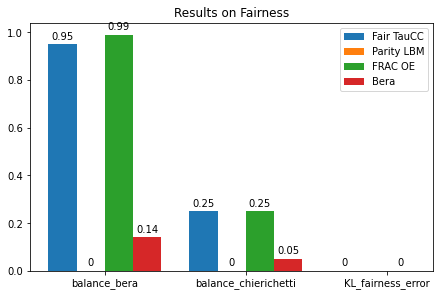

In [14]:
# Dati esemplificativi
algo = df["algorithm"]
metrics_labels = ["balance_bera", "balance_chierichetti", "KL_fairness_error"]

metrics = {
    "Fair TauCC": [],
    "Parity LBM": [],
    "FRAC OE": [],
    "Bera": []
}

metrics_std = {
    "Fair TauCC": [],
    "Parity LBM": [],
    "FRAC OE": [],
    "Bera": []
}

for label in metrics_labels:
    
    metrics["Fair TauCC"].append(
        np.round(taucc[label+"_mean"].values[0], 2)
    )
    metrics_std["Fair TauCC"].append(
        np.round(taucc[label+"_std"].values[0], 2)
    )
    
    metrics["FRAC OE"].append(
        np.round(gupta[label+"_mean"].values[0], 2)
    )
    metrics_std["FRAC OE"].append(
        np.round(gupta[label+"_std"].values[0], 2)
    )
    
    metrics["Parity LBM"].append(
        np.round(frisch[label+"_mean"].values[0], 2)
    )
    metrics_std["Parity LBM"].append(
        np.round(frisch[label+"_std"].values[0], 2)
    )
    
    metrics["Bera"].append(
        np.round(bera[label+"_mean"].values[0], 2)
    )
    metrics_std["Bera"].append(
        np.round(bera[label+"_std"].values[0], 2)
    )
    
print(metrics)

x = np.arange(len(metrics_labels))  # the label locations
width = 0.20  # the width of the bars
multiplier = -0.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in metrics.items():
    offset = width * multiplier
    errors = metrics_std[attribute]
    #rects = ax.bar(x + offset, measurement, width, label=attribute, yerr=errors, capsize=5)
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Results on Fairness')
ax.set_xticks(x + width, metrics_labels)
ax.legend(loc='upper right')

#plt.show()
plt.savefig(plot_path + f"/{dataset}_{sensitive}_fairness.png")

{'Fair TauCC': [0.13, 0.09, 0.13], 'Parity LBM': [0.01, -0.01, 0.0]}


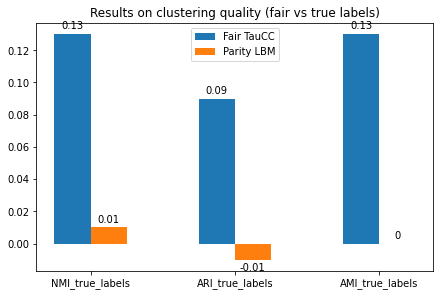

In [15]:
algo = df["algorithm"]
metrics_labels = ["NMI_true_labels", "ARI_true_labels", "AMI_true_labels"]

metrics = {
    "Fair TauCC": [],
    "Parity LBM": []
}

metrics_std = {
    "Fair TauCC": [],
    "Parity LBM": []
}

for label in metrics_labels:
    
    metrics["Fair TauCC"].append(
        np.round(taucc[label+"_mean"].values[0], 2)
    )
    metrics_std["Fair TauCC"].append(
        np.round(taucc[label+"_std"].values[0], 2)
    )
    
    metrics["Parity LBM"].append(
        np.round(frisch[label+"_mean"].values[0], 2)
    )
    metrics_std["Parity LBM"].append(
        np.round(frisch[label+"_std"].values[0], 2)
    )

print(metrics)

x = np.arange(len(metrics_labels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in metrics.items():
    offset = width * multiplier
    errors = metrics_std[attribute]
    #rects = ax.bar(x + offset, measurement, width, label=attribute, yerr=errors, capsize=5)
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Results on clustering quality (fair vs true labels)')
ax.set_xticks(x + width, metrics_labels)
ax.legend(loc='upper center')

#plt.show()
plt.savefig(plot_path + f"/{dataset}_{sensitive}_true_labels.png")


{'Fair TauCC': [0.2, 0.1, 0.2], 'Parity LBM': [0.06, 0.03, 0.04], 'FRAC OE': [0.39, 0.22, 0.39], 'Bera': [0.05, 0.05, 0.05]}


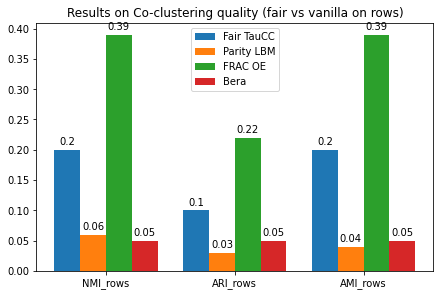

In [16]:
algo = df["algorithm"]
metrics_labels = ["NMI_rows", "ARI_rows", "AMI_rows"]

metrics = {
    "Fair TauCC": [],
    "Parity LBM": [],
    "FRAC OE": [],
    "Bera": []
}

metrics_std = {
    "Fair TauCC": [],
    "Parity LBM": [],
    "FRAC OE": [],
    "Bera": []
}

for label in metrics_labels:
    
    metrics["Fair TauCC"].append(
        np.round(taucc[label+"_mean"].values[0], 2)
    )
    metrics_std["Fair TauCC"].append(
        np.round(taucc[label+"_std"].values[0], 2)
    )
    
    metrics["FRAC OE"].append(
        np.round(gupta[label+"_mean"].values[0], 2)
    )
    metrics_std["FRAC OE"].append(
        np.round(gupta[label+"_std"].values[0], 2)
    )
    
    metrics["Parity LBM"].append(
        np.round(frisch[label+"_mean"].values[0], 2)
    )
    metrics_std["Parity LBM"].append(
        np.round(frisch[label+"_std"].values[0], 2)
    )
    
    metrics["Bera"].append(
        np.round(bera[label+"_mean"].values[0], 2)
    )
    metrics_std["Bera"].append(
        np.round(bera[label+"_std"].values[0], 2)
    )


print(metrics)

x = np.arange(len(metrics_labels))  # the label locations
width = 0.20  # the width of the bars
multiplier = -0.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in metrics.items():
    offset = width * multiplier
    errors = metrics_std[attribute]
    #rects = ax.bar(x + offset, measurement, width, label=attribute, yerr=errors, capsize=5)
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Results on Co-clustering quality (fair vs vanilla on rows)')
ax.set_xticks(x + width, metrics_labels)
ax.legend(loc='upper center')

#plt.show()
plt.savefig(plot_path + f"/{dataset}_{sensitive}_rows.png")

{'Fair TauCC': [0.39, 0.44, 0.39], 'Parity LBM': [0.13, 0.21, 0.11]}


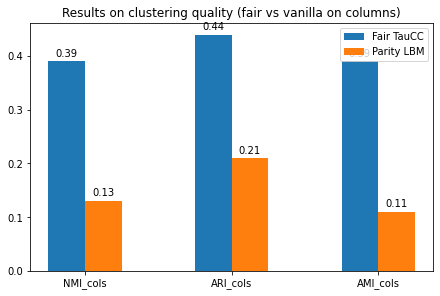

In [17]:
algo = df["algorithm"]
metrics_labels = ["NMI_cols", "ARI_cols", "AMI_cols"]

metrics = {
    "Fair TauCC": [],
    "Parity LBM": []
}

metrics_std = {
    "Fair TauCC": [],
    "Parity LBM": []
}

for label in metrics_labels:
    
    metrics["Fair TauCC"].append(
        np.round(taucc[label+"_mean"].values[0], 2)
    )
    metrics_std["Fair TauCC"].append(
        np.round(taucc[label+"_std"].values[0], 2)
    )
    
    metrics["Parity LBM"].append(
        np.round(frisch[label+"_mean"].values[0], 2)
    )
    metrics_std["Parity LBM"].append(
        np.round(frisch[label+"_std"].values[0], 2)
    )

print(metrics)

x = np.arange(len(metrics_labels))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in metrics.items():
    offset = width * multiplier
    errors = metrics_std[attribute]
    #rects = ax.bar(x + offset, measurement, width, label=attribute, yerr=errors, capsize=5)
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Results on clustering quality (fair vs vanilla on columns)')
ax.set_xticks(x + width, metrics_labels)
ax.legend(loc='upper right')

#plt.show()
plt.savefig(plot_path + f"/{dataset}_{sensitive}_cols.png")
